In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data from the provided HTML files
file1_path = r"C:\Users\Suliat\Documents\Dataset\Project Code\SVM MODEL.html"
file2_path = r"C:\Users\Suliat\Documents\Dataset\Project Code\GBM MODEL.html"

In [6]:
# Since the data is in HTML, we will use Pandas to read the tables directly
data_svm = pd.read_html(file1_path)
data_gbm = pd.read_html(file2_path)


In [7]:
# Assuming the first table in each file is the one of interest
df_svm = data_svm[0]
df_gbm = data_gbm[0]

In [8]:
# Display the first few rows of each dataframe to understand their structure
df_svm.head(), df_gbm.head()

(  Unnamed: 0    Dport      SrcBytes      DstBytes    SrcLoad    DstLoad  \
 0      count  16318.0  16318.000000  16318.000000   16318.00  16318.000   
 1       mean   1111.0    496.650264    187.077706  211840.60  71024.350   
 2        std      0.0     28.584642     18.688525   79429.88  45308.110   
 3        min   1111.0    310.000000    120.000000       0.00    507.447   
 4        25%   1111.0    496.000000    186.000000  199053.50  66355.000   
 
     SrcGap   DstGap       SIntPkt       DIntPkt  ...    Packet_num  \
 0  16318.0  16318.0  16318.000000  16318.000000  ...  16318.000000   
 1      0.0      0.0     10.946755      8.515423  ...   8156.308800   
 2      0.0      0.0    101.230484     52.504560  ...   4709.735634   
 3      0.0      0.0      0.875000      0.730500  ...      1.000000   
 4      0.0      0.0      3.792667      2.226000  ...   4077.250000   
 
            Temp          SpO2    Pulse_Rate           SYS           DIA  \
 0  16318.000000  16318.000000  16318.

C:\Users\Suliat\AppData\Local\Temp\ipykernel_24920\559086463.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_svm.iloc[1:], x="SrcBytes", label="SVM", shade=True)
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Suliat\AppData\Local\Temp\ipykernel_24920\559086463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_gbm.iloc[1:], x="SrcBytes", label="GBM", shade=True)
C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

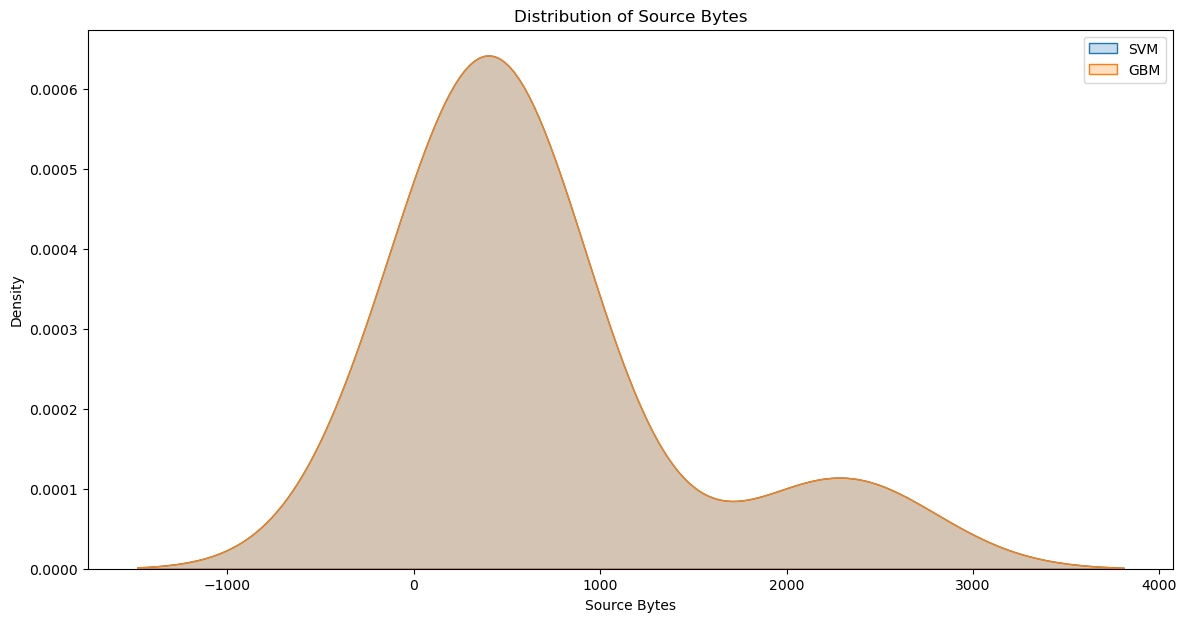

In [9]:
plt.figure(figsize=(14, 7))
sns.kdeplot(df_svm.iloc[1:], x="SrcBytes", label="SVM", shade=True)
sns.kdeplot(df_gbm.iloc[1:], x="SrcBytes", label="GBM", shade=True)
plt.title("Distribution of Source Bytes")
plt.xlabel("Source Bytes")
plt.ylabel("Density")
plt.legend()
plt.show()

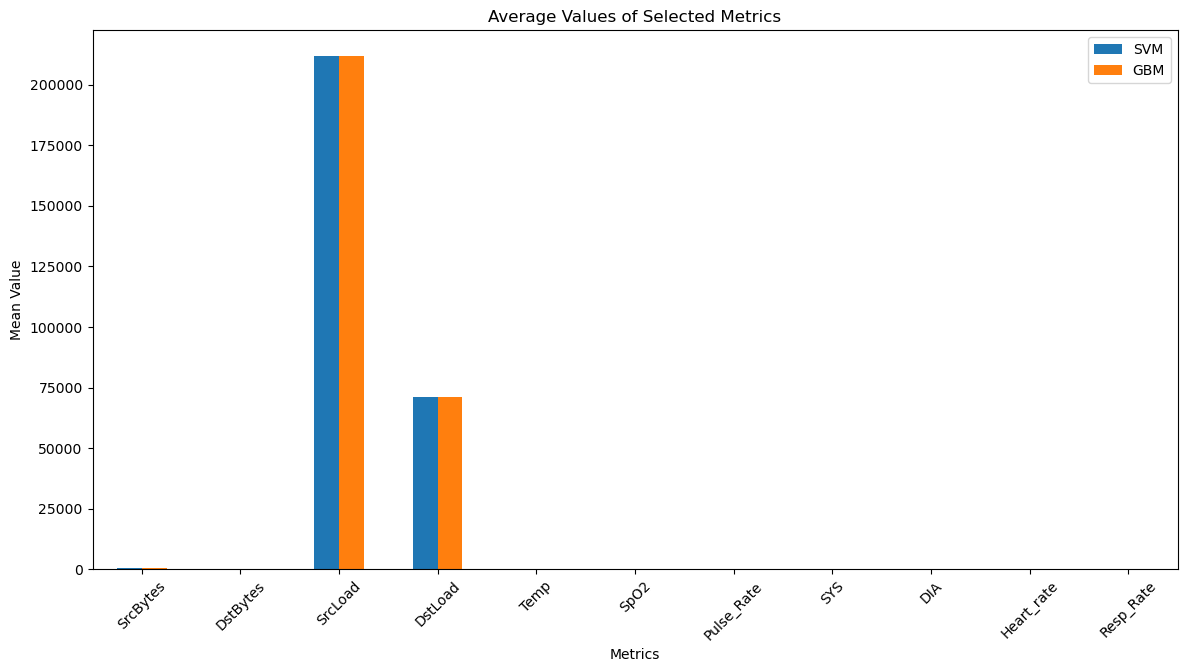

In [10]:
metrics = ["SrcBytes", "DstBytes", "SrcLoad", "DstLoad", "Temp", "SpO2", "Pulse_Rate", "SYS", "DIA", "Heart_rate", "Resp_Rate"]

svm_means = df_svm.iloc[1][metrics].astype(float)
gbm_means = df_gbm.iloc[1][metrics].astype(float)

mean_df = pd.DataFrame({'SVM': svm_means, 'GBM': gbm_means})
mean_df.plot(kind='bar', figsize=(14, 7))
plt.title("Average Values of Selected Metrics")
plt.xlabel("Metrics")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

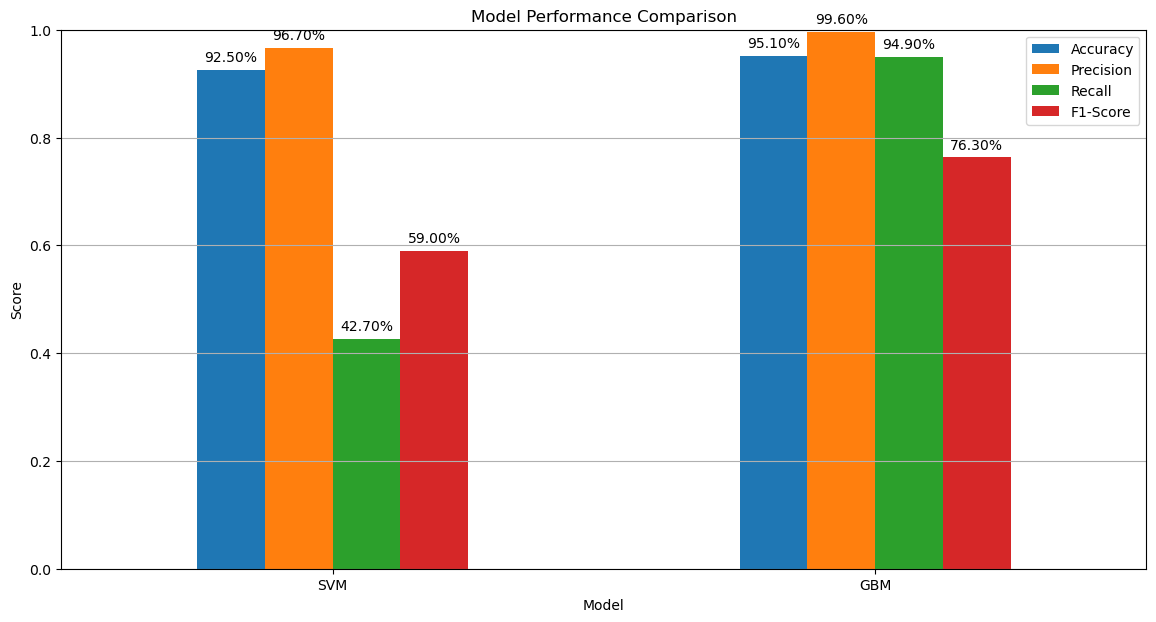

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Metrics data
metrics = {
    'Model': ['SVM', 'GBM'],
    'Accuracy': [0.925, 0.951],
    'Precision': [0.967, 0.996],
    'Recall': [0.427, 0.949],
    'F1-Score': [0.590, 0.763],
    }

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Bar chart for Accuracy, Precision, Recall
plt.figure(figsize=(14, 7))
ax = metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y')

# Adding percentage values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height() * 100, '.2f') + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

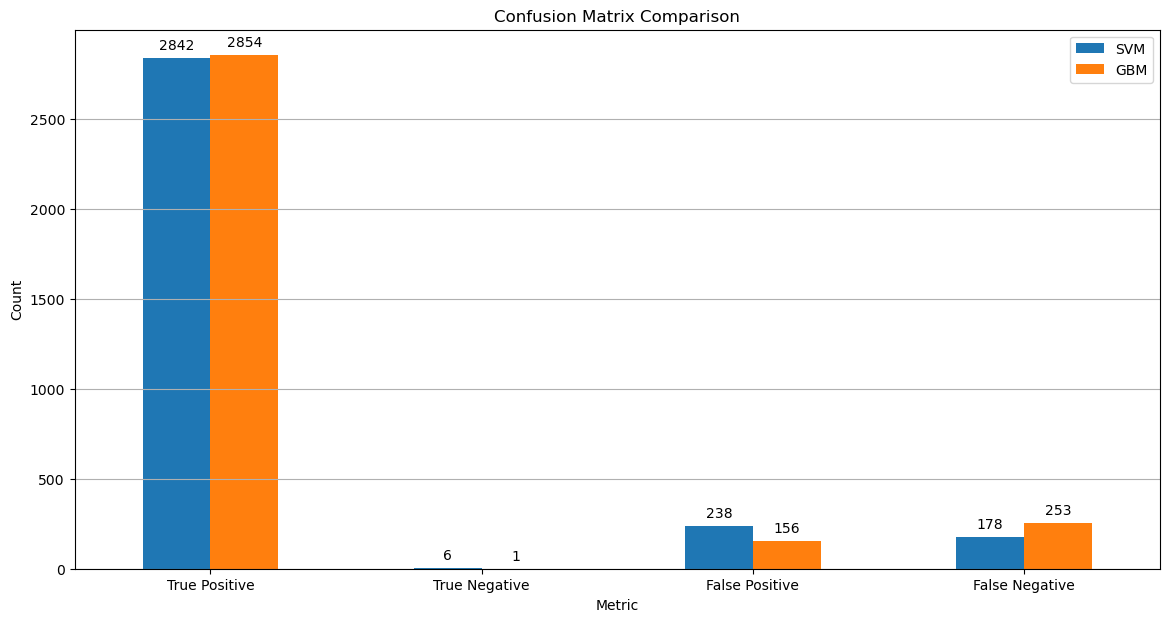

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Confusion matrix data
confusion_matrix_data = {
    'Metric': ['True Positive', 'True Negative', 'False Positive', 'False Negative'],
    'SVM': [2842, 6, 238, 178],
    'GBM': [2854, 1, 156, 253]
}

# Convert the dictionary to a DataFrame
confusion_df = pd.DataFrame(confusion_matrix_data)

# Bar chart for confusion matrix
plt.figure(figsize=(14, 7))
confusion_df.set_index('Metric').plot(kind='bar', ax=plt.gca())
plt.title('Confusion Matrix Comparison')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y')

# Adding values on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

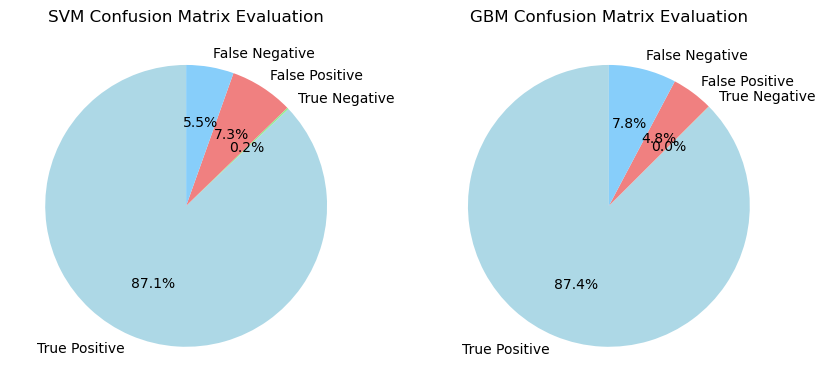

In [13]:
# Pie chart for SVM confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].pie(confusion_df['SVM'], labels=confusion_df['Metric'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
axes[0].set_title('SVM Confusion Matrix Evaluation')

# Pie chart for GBM confusion matrix
axes[1].pie(confusion_df['GBM'], labels=confusion_df['Metric'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
axes[1].set_title('GBM Confusion Matrix Evaluation')

plt.show()